<a href="https://colab.research.google.com/github/4RCAN3/Topic-Modelling-Techniques-on-Wikipedia-Articles/blob/master/TopicModellingComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.170
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.34
clflush size	: 64
cache_alignment	: 64
ad

## Loading the data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('wiki.csv')
df

,Unnamed: 0.1,Unnamed: 0,text,category_label,url,tokenized_text
0,0,0,\n Celebrity is a condition of fame and broad ...,Culture and Humanities,/wiki/Celebrities,"['celebrity', 'is', 'condition', 'of', 'fame',..."
1,1,1,Classics or classical studies is the study of ...,Culture and Humanities,/wiki/Classics,"['classics', 'or', 'classical', 'studies', 'is..."
2,2,2,\n South Asia \n Middle East\n Europe\n North ...,Culture and Humanities,/wiki/Critical_theory,"['south', 'asia', 'middle', 'east', 'europe', ..."
3,3,3,\n Language is a structured system of communic...,Culture and Humanities,/wiki/Language,"['language', 'is', 'structured', 'system', 'of..."
4,4,4,A cultural movement is a change in the way a n...,Culture and Humanities,/wiki/Cultural_movement,"['cultural', 'movement', 'is', 'change', 'in',..."
...,...,...,...,...,...,...
5663,5785,5785,"\n Computer security, cyber security, digital ...",Related,/wiki/Cybersecurity,"['computer', 'security', 'cyber', 'security', ..."
5664,5786,5786,Lucius Cornelius Alexander Polyhistor (Ancient...,Related,/wiki/Alexander_Polyhistor,"['lucius', 'cornelius', 'alexander', 'polyhist..."
5665,5787,5787,The Culture Fair Intelligence Test (CFIT) was ...,Related,/wiki/Cattell_Culture_Fair_III,"['the', 'culture', 'fair', 'intelligence', 'te..."
5666,5788,5788,\n \n A nonprofit organization (NPO) or non-pr...,Related,/wiki/Non-profit_organisation,"['nonprofit', 'organization', 'npo', 'or', 'no..."


## Preprocessing Text

In [ ]:
import re
#remove punctuation and convert to lower
df['processed_text'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x).lower())
df

,Unnamed: 0.1,Unnamed: 0,text,category_label,url,tokenized_text,processed_text
0,0,0,\n Celebrity is a condition of fame and broad ...,Culture and Humanities,/wiki/Celebrities,"['celebrity', 'is', 'condition', 'of', 'fame',...",\n celebrity is a condition of fame and broad ...
1,1,1,Classics or classical studies is the study of ...,Culture and Humanities,/wiki/Classics,"['classics', 'or', 'classical', 'studies', 'is...",classics or classical studies is the study of ...
2,2,2,\n South Asia \n Middle East\n Europe\n North ...,Culture and Humanities,/wiki/Critical_theory,"['south', 'asia', 'middle', 'east', 'europe', ...",\n south asia \n middle east\n europe\n north ...
3,3,3,\n Language is a structured system of communic...,Culture and Humanities,/wiki/Language,"['language', 'is', 'structured', 'system', 'of...",\n language is a structured system of communic...
4,4,4,A cultural movement is a change in the way a n...,Culture and Humanities,/wiki/Cultural_movement,"['cultural', 'movement', 'is', 'change', 'in',...",a cultural movement is a change in the way a n...
...,...,...,...,...,...,...,...
5663,5785,5785,"\n Computer security, cyber security, digital ...",Related,/wiki/Cybersecurity,"['computer', 'security', 'cyber', 'security', ...",\n computer security cyber security digital se...
5664,5786,5786,Lucius Cornelius Alexander Polyhistor (Ancient...,Related,/wiki/Alexander_Polyhistor,"['lucius', 'cornelius', 'alexander', 'polyhist...",lucius cornelius alexander polyhistor (ancient...
5665,5787,5787,The Culture Fair Intelligence Test (CFIT) was ...,Related,/wiki/Cattell_Culture_Fair_III,"['the', 'culture', 'fair', 'intelligence', 'te...",the culture fair intelligence test (cfit) was ...
5666,5788,5788,\n \n A nonprofit organization (NPO) or non-pr...,Related,/wiki/Non-profit_organisation,"['nonprofit', 'organization', 'npo', 'or', 'no...",\n \n a nonprofit organization (npo) or non-pr...


In [ ]:
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df.processed_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['celebrity', 'condition', 'fame', 'broad', 'public', 'recognition', 'person', 'group', 'result', 'attention', 'given', 'mass', 'media', 'individual', 'may', 'attain', 'celebrity', 'status', 'great', 'wealth', 'participation', 'sports', 'entertainment', 'industry', 'position', 'political', 'figure', 'even', 'connection', 'another']


In [ ]:
df['tokenized__processed_text'] = data_words
df

,Unnamed: 0.1,Unnamed: 0,text,category_label,url,tokenized_text,processed_text,tokenized__processed_text
0,0,0,\n Celebrity is a condition of fame and broad ...,Culture and Humanities,/wiki/Celebrities,"['celebrity', 'is', 'condition', 'of', 'fame',...",\n celebrity is a condition of fame and broad ...,"[celebrity, condition, fame, broad, public, re..."
1,1,1,Classics or classical studies is the study of ...,Culture and Humanities,/wiki/Classics,"['classics', 'or', 'classical', 'studies', 'is...",classics or classical studies is the study of ...,"[classics, classical, studies, study, classica..."
2,2,2,\n South Asia \n Middle East\n Europe\n North ...,Culture and Humanities,/wiki/Critical_theory,"['south', 'asia', 'middle', 'east', 'europe', ...",\n south asia \n middle east\n europe\n north ...,"[south, asia, middle, east, europe, north, ame..."
3,3,3,\n Language is a structured system of communic...,Culture and Humanities,/wiki/Language,"['language', 'is', 'structured', 'system', 'of...",\n language is a structured system of communic...,"[language, structured, system, communication, ..."
4,4,4,A cultural movement is a change in the way a n...,Culture and Humanities,/wiki/Cultural_movement,"['cultural', 'movement', 'is', 'change', 'in',...",a cultural movement is a change in the way a n...,"[cultural, movement, change, way, number, diff..."
...,...,...,...,...,...,...,...,...
5663,5785,5785,"\n Computer security, cyber security, digital ...",Related,/wiki/Cybersecurity,"['computer', 'security', 'cyber', 'security', ...",\n computer security cyber security digital se...,"[computer, security, cyber, security, digital,..."
5664,5786,5786,Lucius Cornelius Alexander Polyhistor (Ancient...,Related,/wiki/Alexander_Polyhistor,"['lucius', 'cornelius', 'alexander', 'polyhist...",lucius cornelius alexander polyhistor (ancient...,"[lucius, cornelius, alexander, polyhistor, anc..."
5665,5787,5787,The Culture Fair Intelligence Test (CFIT) was ...,Related,/wiki/Cattell_Culture_Fair_III,"['the', 'culture', 'fair', 'intelligence', 'te...",the culture fair intelligence test (cfit) was ...,"[culture, fair, intelligence, test, cfit, crea..."
5666,5788,5788,\n \n A nonprofit organization (NPO) or non-pr...,Related,/wiki/Non-profit_organisation,"['nonprofit', 'organization', 'npo', 'or', 'no...",\n \n a nonprofit organization (npo) or non-pr...,"[nonprofit, organization, npo, non, profit, or..."


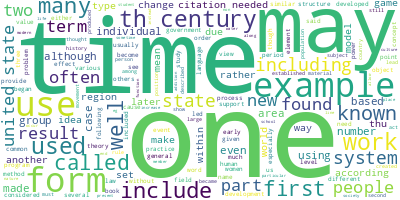

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
processed_text = [' '.join(t) for t in df['tokenized__processed_text']]
long_string = ','.join(processed_text)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Creating document frequency vectors and the dictionary

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 2), (15, 10), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 3), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1)]


In [ ]:
print(len(corpus[0]))

1053


## Lda Model (10 passes, 65 topics)

In [ ]:
from pprint import pprint
# number of topics
num_topics = 65
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42,
                                       workers=2,
                                       passes = 10
                                       )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(52,
  '0.013*"species" + 0.007*"population" + 0.006*"forest" + 0.006*"land" + '
  '0.006*"climate" + 0.006*"environmental" + 0.006*"plants" + 0.005*"also" + '
  '0.005*"plant" + 0.005*"change"'),
 (55,
  '0.024*"test" + 0.013*"iq" + 0.012*"intelligence" + 0.012*"scores" + '
  '0.010*"tests" + 0.009*"sat" + 0.009*"score" + 0.008*"students" + '
  '0.006*"high" + 0.005*"ability"'),
 (51,
  '0.008*"gender" + 0.006*"social" + 0.005*"women" + 0.005*"sex" + '
  '0.005*"also" + 0.005*"work" + 0.005*"may" + 0.004*"economic" + '
  '0.004*"people" + 0.004*"rights"'),
 (15,
  '0.009*"used" + 0.008*"light" + 0.006*"telescope" + 0.006*"color" + '
  '0.006*"radio" + 0.005*"design" + 0.005*"use" + 0.004*"also" + 0.004*"using" '
  '+ 0.004*"space"'),
 (29,
  '0.015*"acid" + 0.009*"chemical" + 0.009*"reaction" + 0.008*"hydrogen" + '
  '0.007*"used" + 0.007*"oxygen" + 0.007*"carbon" + 0.006*"water" + '
  '0.006*"acids" + 0.006*"compounds"'),
 (19,
  '0.016*"neptunium" + 0.014*"np" + 0.014*"lowell" + 0.

In [ ]:
lda_model.save('lda_model.gensim')

In [ ]:
from gensim import corpora, models

model =  models.LdaModel.load('lda_model.gensim')

# print all topics
model.show_topics(num_topics = 65)


[(0,
  '0.010*"food" + 0.008*"used" + 0.006*"use" + 0.006*"also" + 0.005*"water" + 0.004*"production" + 0.004*"many" + 0.004*"fish" + 0.003*"made" + 0.003*"may"'),
 (1,
  '0.008*"moral" + 0.007*"good" + 0.007*"ethics" + 0.007*"one" + 0.005*"people" + 0.005*"life" + 0.005*"also" + 0.004*"reading" + 0.004*"ethical" + 0.004*"happiness"'),
 (2,
  '0.018*"gold" + 0.014*"xenon" + 0.009*"radiation" + 0.008*"used" + 0.008*"platinum" + 0.006*"gas" + 0.005*"high" + 0.005*"also" + 0.004*"molybdenum" + 0.004*"argon"'),
 (3,
  '0.011*"chess" + 0.008*"pornography" + 0.006*"one" + 0.006*"two" + 0.005*"also" + 0.005*"may" + 0.004*"used" + 0.004*"move" + 0.004*"board" + 0.004*"porn"'),
 (4,
  '0.022*"television" + 0.022*"radio" + 0.018*"cards" + 0.014*"card" + 0.010*"broadcasting" + 0.009*"channel" + 0.009*"tv" + 0.009*"broadcast" + 0.009*"stations" + 0.008*"company"'),
 (5,
  '0.051*"women" + 0.009*"suffrage" + 0.007*"movement" + 0.006*"rights" + 0.006*"violence" + 0.006*"men" + 0.005*"woman" + 0.005*

## NMF model

In [ ]:
import scipy as sp
import sklearn
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [ ]:
processed_text = [' '.join(text) for text in data_words]
processed_text[0]

'celebrity condition fame broad public recognition person group result attention given mass media individual may attain celebrity status great wealth participation sports entertainment industry position political figure even connection another celebrity celebrity usually implies favorable public image opposed neutrals famous notable negatives infamous notorious book dead famous unexpected history celebrity british historian greg jenner uses definition celebrity noun unique persona made widely known public via media coverage whose life publicly consumed dramatic entertainment whose commercial brand made profitable exploit popularity perhaps also although book subtitled bronze age silver screen despite fact recently sociologists argued celebrity invented years ago flickering glimmer early hollywood suggestion medieval saints might qualify jenner asserts earliest celebrities lived early first example henry sacheverell athletes ancient greece welcomed home heroes songs poems written honor 

In [ ]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(processed_text)

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [ ]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [ ]:
xtfidf_norm

<5668x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2478403 stored elements in Compressed Sparse Row format>

In [ ]:
num_topics=65
model = NMF(n_components=num_topics, init='nndsvd');
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=65)

In [ ]:
feat_names = vectorizer.get_feature_names_out()

word_dict = {}
for i in range(num_topics):

    #for each topic, obtain the largest values, and add the words they map to into the dictionary.
    words_ids = model.components_[i].argsort()[:-10 - 1:-1]
    words = [feat_names[key] for key in words_ids]
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = words

In [ ]:
import joblib

joblib.dump(model, 'nmf_model.pkl')
loaded_model = joblib.load('nmf_model.pkl')

In [ ]:
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 56,Topic # 57,Topic # 58,Topic # 59,Topic # 60,Topic # 61,Topic # 62,Topic # 63,Topic # 64,Topic # 65
0,health,list,stub,displaystyle,games,radio,university,gdp,game,refer,...,dental,upanishads,fallacy,football,journals,iq,de,acid,film,galaxies
1,medical,video,wikipedia,mathbb,video,stations,professor,country,cards,renaissance,...,teeth,principal,fallacies,events,academic,notable,la,acids,films,galaxy
2,care,notable,expanding,mathcal,game,broadcasting,college,capita,player,may,...,oral,vedic,argument,world,articles,society,france,amino,fiction,cluster
3,medicine,following,article,x_,arcade,television,american,top,card,man,...,tooth,hinduism,premises,following,environmental,fields,french,fatty,cinema,clusters
4,blood,includes,help,entropy,sport,private,born,provinces,players,also,...,plaque,commentaries,conclusion,throughout,peer,members,des,protein,festival,light
5,disease,extension,related,frac,japan,portugal,research,regions,play,love,...,degrees,brahman,logic,year,reviewed,distinguished,le,proteins,fantasy,star
6,patients,topics,compound,function,exclusively,following,phd,billion,played,happiness,...,school,vedanta,valid,africa,conference,international,et,cell,award,dwarf
7,treatment,fields,organic,log,titles,state,school,per,suit,person,...,professional,upanishad,logical,ages,formerly,opera,spanish,cells,awards,stars
8,patient,distinguished,relating,a_,annual,commercial,oxford,data,deck,feeling,...,schools,shankara,false,league,science,contains,paris,carbon,animation,gravitational
9,therapy,genetics,derived,space,playing,telescope,faculty,us,hand,learning,...,health,bce,true,american,nine,high,society,dna,story,million


## LSA implementation

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_topics = 65
svd_model = TruncatedSVD(n_components=n_topics, n_iter=100, random_state=42)
svd_model.fit(xtfidf_norm)

TruncatedSVD(n_components=65, n_iter=100, random_state=42)

In [ ]:
for i, topic in enumerate(svd_model.components_):
    print(f"Topic {i}:")
    print([feat_names[i] for i in topic.argsort()[-10:]])

Topic 0:
['may', 'one', 'games', 'also', 'expanding', 'article', 'displaystyle', 'stub', 'wikipedia', 'list']
Topic 1:
['disorders', 'following', 'chess', 'sports', 'game', 'radio', 'video', 'stations', 'games', 'list']
Topic 2:
['games', 'radio', 'journal', 'stations', 'help', 'list', 'article', 'expanding', 'stub', 'wikipedia']
Topic 3:
['help', 'mathbf', 'radio', 'article', 'expanding', 'stub', 'stations', 'wikipedia', 'list', 'displaystyle']
Topic 4:
['gdp', 'state', 'station', 'university', 'philosophy', 'following', 'list', 'foreign', 'radio', 'stations']
Topic 5:
['wikipedia', 'games', 'players', 'foreign', 'card', 'player', 'cards', 'game', 'radio', 'stations']
Topic 6:
['expanding', 'egyptian', 'wikipedia', 'used', 'stub', 'may', 'refer', 'water', 'list', 'gdp']
Topic 7:
['billion', 'regions', 'provinces', 'top', 'government', 'owned', 'county', 'capita', 'country', 'gdp']
Topic 8:
['stations', 'sport', 'olympics', 'olympic', 'radio', 'government', 'owned', 'sports', 'video', 

In [ ]:
joblib.dump(svd_model, 'lsa_model.pkl')
#loaded_model = joblib.load('lsa_model.pkl')

['lsa_model.pkl']

## Implementing top2vec

In [ ]:
!pip install top2vec[sentence_transformers]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from top2vec import Top2Vec

In [ ]:
top2vec_model = Top2Vec(documents=df['text'].tolist(), speed="learn", workers=2, embedding_model = 'all-MiniLM-L6-v2')

In [ ]:
top2vec_model.get_num_topics()

65

In [ ]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
topic_sizes, topic_nums

(array([283, 194, 187, 183, 183, 177, 169, 164, 149, 137, 134, 130, 116,
        116, 112, 106, 102, 100, 100,  97,  97,  95,  95,  95,  95,  91,
         88,  82,  82,  80,  75,  70,  68,  65,  64,  64,  64,  63,  63,
         61,  61,  60,  58,  57,  55,  55,  55,  54,  52,  50,  50,  49,
         49,  47,  45,  45,  44,  44,  43,  40,  37,  37,  31,  28,  26]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]))

In [ ]:
top2vec_model.save("top2vec_model")

## Loading and Evaluation of models


In [ ]:
top2vec_model = Top2Vec.load("top2vec_model")

In [ ]:
import joblib
nmf_model = joblib.load('nmf_model.pkl')
lsa_model = joblib.load('lsa_model.pkl')

In [ ]:
from gensim import corpora, models

lda_model =  models.LdaModel.load('lda_model.gensim')

In [ ]:
# Extract LSA topics
feat_names = vectorizer.get_feature_names_out()

lsa_topics = [[feat_names[i] for i in topic.argsort()[-20:]] for topic in lsa_model.components_]

# Extract NMF topics
nmf_topics = [[feat_names[i] for i in topic.argsort()[-20:]] for topic in nmf_model.components_]

# Extract LDA topics (gensim model)
lda_topics = [[word for word, _ in lda_model.show_topic(i, topn=20)] for i in range(lda_model.num_topics)]

In [ ]:
# Convert documents into tokenized form for coherence model
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

texts = [doc.lower().split() for doc in df['text']]
dictionary = Dictionary(texts)
# Coherence for LDA
coherence_lda = CoherenceModel(topics=lda_topics, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

# Coherence for LSA
coherence_lsa = CoherenceModel(topics=lsa_topics, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

# Coherence for NMF
coherence_nmf = CoherenceModel(topics=nmf_topics, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence LDA: {coherence_lda}")
print(f"Coherence LSA: {coherence_lsa}")
print(f"Coherence NMF: {coherence_nmf}")


Coherence LDA: 0.4511657224667794
Coherence LSA: 0.3185500081342274
Coherence NMF: 0.48470698075635515


In [ ]:
coherence_t2v = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

In [ ]:
print(f"Coherence Top2Vec: {coherence_t2v}")

Coherence Top2Vec: 0.5146552384246487


In [ ]:
def calculate_topic_diversity(topics):
    unique_words = set()
    total_words = 0
    for topic in topics:
        unique_words.update(topic)
        total_words += len(topic)

    return len(unique_words) / total_words

# Topic diversity for each model
diversity_lda = calculate_topic_diversity(lda_topics)
diversity_lsa = calculate_topic_diversity(lsa_topics)
diversity_nmf = calculate_topic_diversity(nmf_topics)
diversity_t2v = calculate_topic_diversity(topic_words)

print(f"Topic Diversity LDA: {diversity_lda}")
print(f"Topic Diversity LSA: {diversity_lsa}")
print(f"Topic Diversity NMF: {diversity_nmf}")
print(f"Topic Diversity Top2Vec: {diversity_t2v}")

Topic Diversity LDA: 0.5838461538461538
Topic Diversity LSA: 0.2553846153846154
Topic Diversity NMF: 0.7230769230769231
Topic Diversity Top2Vec: 0.7683076923076924


In [ ]:
from itertools import combinations

def jaccard_similarity(topic1, topic2):
    set1, set2 = set(topic1), set(topic2)
    return len(set1 & set2) / len(set1 | set2)

def calculate_jaccard_similarities(topics):
    similarities = []
    for topic1, topic2 in combinations(topics, 2):
        similarities.append(jaccard_similarity(topic1, topic2))
    return np.mean(similarities)

# Jaccard similarity for each model
jaccard_lda = calculate_jaccard_similarities(lda_topics)
jaccard_lsa = calculate_jaccard_similarities(lsa_topics)
jaccard_nmf = calculate_jaccard_similarities(nmf_topics)
jaccard_t2v = calculate_jaccard_similarities(topic_words)

print(f"Jaccard Similarity LDA: {jaccard_lda}")
print(f"Jaccard Similarity LSA: {jaccard_lsa}")
print(f"Jaccard Similarity NMF: {jaccard_nmf}")
print(f"Jaccard Similarity Top2Vec: {jaccard_t2v}")

Jaccard Similarity LDA: 0.05429401630729328
Jaccard Similarity LSA: 0.05982847347799576
Jaccard Similarity NMF: 0.007148445626357034
Jaccard Similarity Top2Vec: 0.005913005922155844


In [ ]:
# Get document-topic distribution for LDA
lda_doc_topic = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# Convert to array form (for each document, topic probabilities)
lda_doc_topic_matrix = np.array([[tup[1] for tup in doc] for doc in lda_doc_topic])


In [ ]:
# lsa_doc_topic is the document-topic matrix from LSA model
lsa_doc_topic_matrix = lsa_model.transform(xtfidf_norm)  # Example using TF-IDF matrix

In [ ]:
# nmf_doc_topic is the document-topic matrix from NMF model
nmf_doc_topic_matrix = nmf_model.transform(xtfidf_norm)  # Example using TF-IDF matrix

In [ ]:
# Get document embeddings from the trained Top2Vec model
top2vec_doc_embeddings = top2vec_model.document_vectors

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Apply t-SNE on the document-topic matrix (for LDA as an example)
tsne_lda = TSNE(n_components=3, random_state=0)
lda_tsne_results = tsne_lda.fit_transform(lda_doc_topic_matrix)

# Repeat for LSA, NMF, and Top2Vec
tsne_lsa = TSNE(n_components=3, random_state=0)
lsa_tsne_results = tsne_lsa.fit_transform(lsa_doc_topic_matrix)

tsne_nmf = TSNE(n_components=3, random_state=0)
nmf_tsne_results = tsne_nmf.fit_transform(nmf_doc_topic_matrix)

tsne_top2vec = TSNE(n_components=3, random_state=0)
top2vec_tsne_results = tsne_top2vec.fit_transform(top2vec_doc_embeddings)


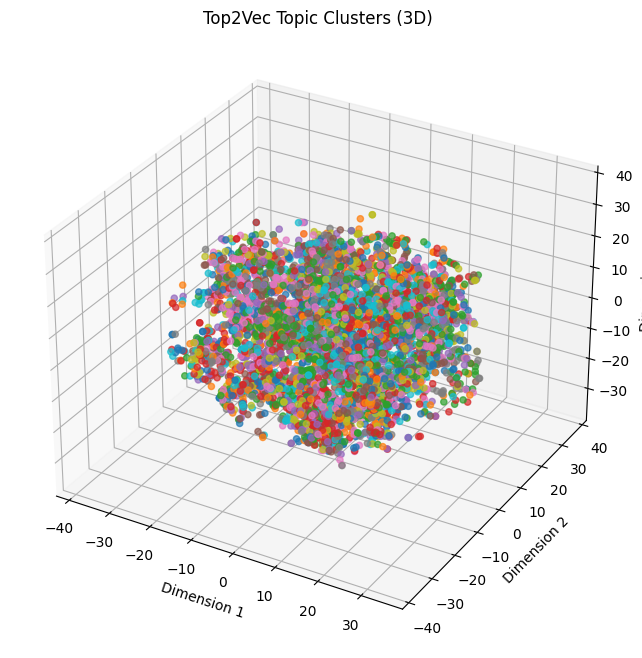

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(top2vec_tsne_results[:, 0], top2vec_tsne_results[:, 1], top2vec_tsne_results[:, 2],
           c=top2vec_doc_embeddings.argmax(axis=1), cmap='tab10', alpha=0.7)
ax.set_title("Top2Vec Topic Clusters (3D)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

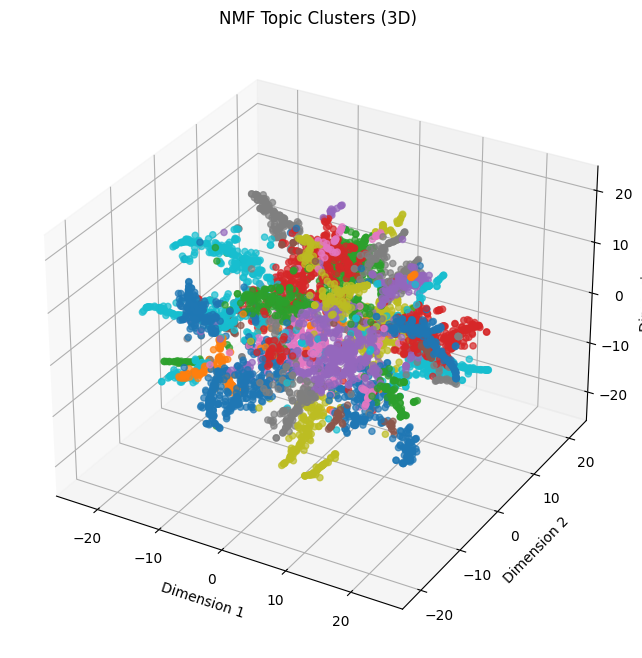

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nmf_tsne_results[:, 0], nmf_tsne_results[:, 1], nmf_tsne_results[:, 2],
           c=nmf_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
ax.set_title("NMF Topic Clusters (3D)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

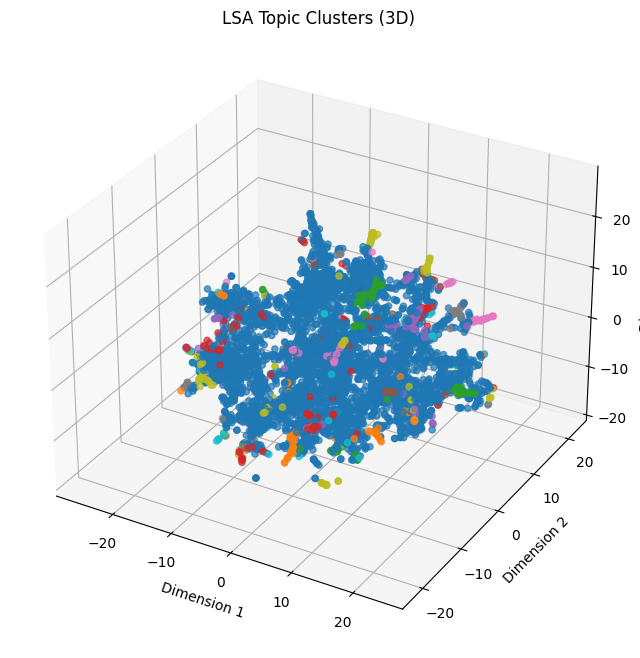

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lsa_tsne_results[:, 0], lsa_tsne_results[:, 1], lsa_tsne_results[:, 2],
           c=lsa_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
ax.set_title("LSA Topic Clusters (3D)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

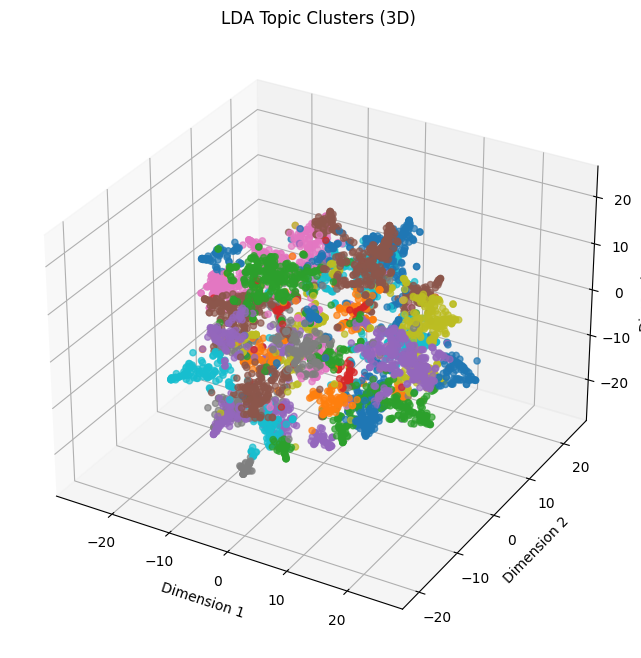

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lda_tsne_results[:, 0], lda_tsne_results[:, 1], lda_tsne_results[:, 2],
           c=lda_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
ax.set_title("LDA Topic Clusters (3D)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


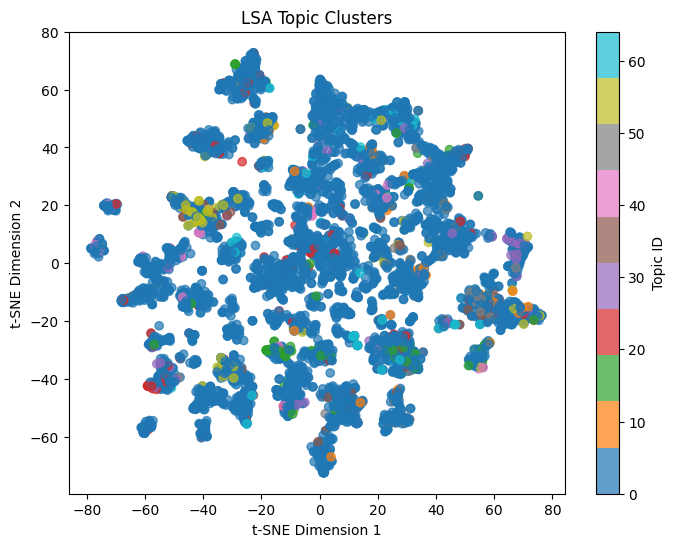

In [ ]:
import matplotlib.pyplot as plt

# Example visualization for LDA
plt.figure(figsize=(8, 6))
plt.scatter(lda_tsne_results[:, 0], lda_tsne_results[:, 1], c=lsa_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
plt.title("LSA Topic Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Topic ID")
plt.show()

# Repeat similar code for LSA, NMF, and Top2Vec


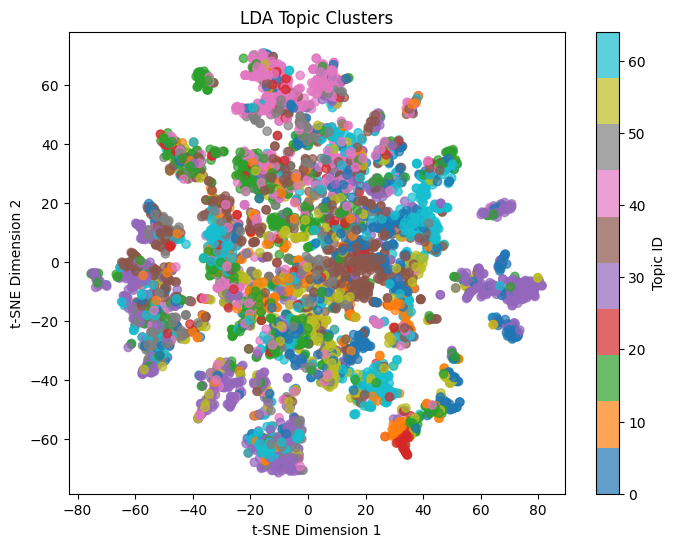

In [ ]:
import matplotlib.pyplot as plt

# Example visualization for LSA
plt.figure(figsize=(8, 6))
plt.scatter(lsa_tsne_results[:, 0], lsa_tsne_results[:, 1], c=lda_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
plt.title("LSA Topic Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Topic ID")
plt.show()


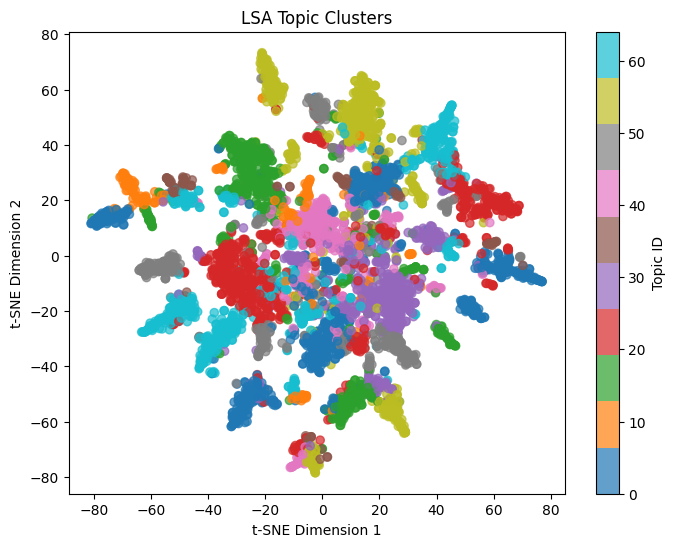

In [ ]:
import matplotlib.pyplot as plt

# Example visualization for NMF
plt.figure(figsize=(8, 6))
plt.scatter(nmf_tsne_results[:, 0], nmf_tsne_results[:, 1], c=nmf_doc_topic_matrix.argmax(axis=1), cmap='tab10', alpha=0.7)
plt.title("NMF Topic Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Topic ID")
plt.show()

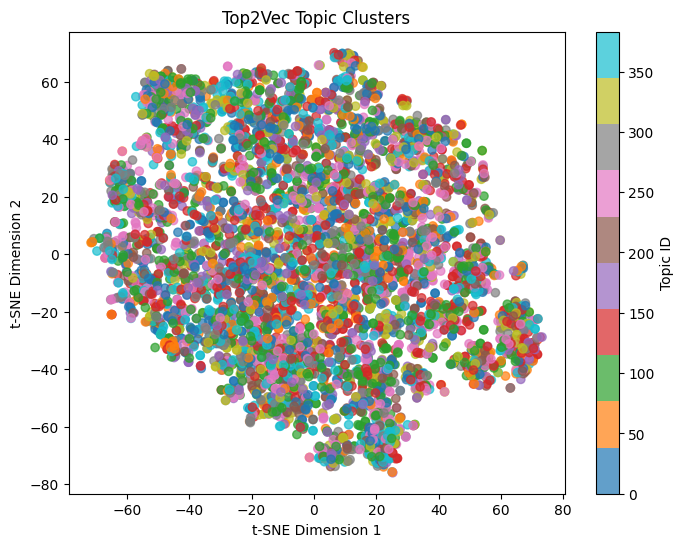

In [ ]:
import matplotlib.pyplot as plt

# Example visualization for LDA
plt.figure(figsize=(8, 6))
plt.scatter(top2vec_tsne_results[:, 0], top2vec_tsne_results[:, 1], c=top2vec_doc_embeddings.argmax(axis=1), cmap='tab10', alpha=0.7)
plt.title("Top2Vec Topic Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Topic ID")
plt.show()


## Implementing and Evaluating BERTopic

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

# Create BERTopic model
topic_model = BERTopic()

# Fit the model on the documents
topics, probabilities = topic_model.fit_transform(df['text'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel

# Prepare the corpus for coherence evaluation
tokenized_documents = [doc.split() for doc in df['text']]

# Create a dictionary and corpus
dictionary = Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(text) for text in tokenized_documents]

# Get the topic terms from the BERTopic model
topic_terms = [topic_model.get_topic(i) for i in range(len(set(topics)))]

# Coherence model using 'c_v
topic_terms

In [ ]:
for topic in topic_terms:
    if type(topic) == bool:
      topic_terms.remove(topic)


In [ ]:
topic_words = [[word for word, prob in topic] for topic in topic_terms]

In [ ]:
coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.5967219715427102


In [ ]:
def calculate_topic_diversity(topic_terms):
    unique_terms = set()
    total_terms = 0
    for topic in topic_terms:
        words = [word for word, _ in topic]
        total_terms += len(words)
        unique_terms.update(words)
    return len(unique_terms) / total_terms

topic_diversity = calculate_topic_diversity(topic_terms)
print(f"Topic Diversity: {topic_diversity}")


Topic Diversity: 0.7638095238095238


In [ ]:
from sklearn.metrics import jaccard_score
import numpy as np

from itertools import combinations

def jaccard_similarity(topic1, topic2):
    set1, set2 = set(topic1), set(topic2)
    return len(set1 & set2) / len(set1 | set2)

def calculate_jaccard_similarities(topics):
    similarities = []
    for topic1, topic2 in combinations(topics, 2):
        similarities.append(jaccard_similarity(topic1, topic2))
    return np.mean(similarities)



print("Jaccard Similarity Score:", calculate_jaccard_similarities(topic_words))


Jaccard Similarity Score: 0.010207319545001986


In [ ]:
# Visualize documents in 2D space
fig = topic_model.visualize_documents(df['text'])
fig.show()
